# Final exam DSE 200

Your task in this take-home exam is to analyze the evolution of poverty and income distribution in the United States.

### Data source: 

You will download the data for this assignment from:
https://www.census.gov/did/www/saipe/data/statecounty/data/index.html

For each year from 1989 to 2004 download the data for US as a whole, for all states and for all counties. You need to download files whose names have the format `est--ALL.txt` or `est--ALL.dat` where `--` is the respective year.

The data fields are described here:

https://www.census.gov/did/www/saipe/data/statecounty/data/2000.html about the data to extract the required fields. The required fields are: 
   'State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
   'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
   'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal'
 
You can directly read the text data into a data frame or you can first make it into a csv, then convert to  data frame

### Pandas Data-Frames

    - separate the row with the country-wide data
    - create a data frame with just the data of the states
    - create a data frame with just the data of the counties

Store the data corresponding to a year in dictionaries
    
3) Plot a graph of 'Poverty Percent All Ages' of the entire country vs year (line graph).
   Plot a graph of 'Median Household Income' of the entire country vs year (line graph)

4) Create a dataframe with percent point change (current percent - previous percent) for 'Poverty Percent All Ages' for each state over the years. This will require you to use the previously created state data-frames for each year and extract the appropriate data and do the computation for  percent point change.
Plot the percent point change for the first five states (Alabama, Alaska, Arizona, Arkansas, California) over the years as a bar graph. Make sure to use subplots and mark each graph created with the corresponding state Name

5) Create a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 1993, 'Poverty Percent All Ages' in every county in 2013 and the percent point change between 1993 and 2013.
FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Please note that before combining, make sure the state code is 2 digits and county code is 3 digits by adding zeroes to the front.
Plot the 'Poverty Percent All Ages' for each county on the map for the years 1993 and 2013.
Then plot the percent point change on the map.
Also plot a line graph of the change.
Find the counties which witnessed the most positive and most negative change in poverty,

For this visualization, we will use a library called Vincent, which lets you plot data for places using their FIPS code instead of using latitude/longitude. 

To install vincent do pip install vincent or conda install vincent
To use it in the notebook and display the maps inside the notebook do
import vincent
vincent.core.initialize_notebook()

You can find further details about how to use it here - http://wrobstory.github.io/2013/10/mapping-data-python.html and https://github.com/wrobstory/vincent

Before closing your notebook, please clear the output of the vincent maps as it becomes difficult of reload the notebook later.

Tips: -  
    Check the type of datafields before operating on them. It will also help you debug for errors.
    Clean the data before using it. There are some non-float items in some columns. Drop those rows before using them




   

In [ ]:
%pylab inline

In [2]:
import pandas as pd

In [3]:
import urllib2

urls = ['https://www.census.gov/did/www/saipe/downloads/estmod93/est93ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod95/est95ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod97/est97ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod98/est98ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod99/est99ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod00/est00ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod01/est01ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod02/est02ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod03/est03ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod04/est04ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod05/est05ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod06/est06ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod07/est07ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod08/est08ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod09/est09ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod10/est10ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod11/est11all.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod12/est12ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod13/est13ALL.txt']
dfs = {}
def getUrl(urls):
    for url in urls:
        response = urllib2.urlopen(url)
        lines = response.read().split('\n')
        del lines[-1]
        #TODO -code to use the text data
        output = []
        for line in lines:
            newLine1 = line[:140].split()
            newLine2 = line[193:238].strip().split('\n')
            newLine3 = line[238:242].strip().split()
            output.append(newLine1+newLine2+newLine3)
        df = pd.DataFrame(output)
        y = url.split('/')[-1][3:5]
        year = "19"+y if y[0] == '9' else "20"+y
        dfs[year]=df
        
getUrl(urls)

In [4]:
year_poverty_dict = {}
year_states_df_dict = {}
year_county_df_dict = {}

In [5]:
needed_cols_oldformat = [0,1,2,5,8,11,14,17,20,21,22]
column_names = ['State FIPS','County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
                'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
                'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal']
for year,df in dfs.iteritems():
    df1 = df.ix[:,needed_cols_oldformat]  # selected and renamed columns
    df1.columns = column_names
    df1
    df1['County FIPS'] = df1['County FIPS'].astype('int') 
    df1['State FIPS'] = df1['State FIPS'].astype('int') 
    df1.dtypes
    df1.ix[:,0] = df1.ix[:,0].apply(lambda x: "{0:02}".format(x))
    df1.ix[:,1] = df1.ix[:,1].apply(lambda x: "{0:03}".format(x))
    df1.insert(2, "FIPS", df1.ix[:,0]+df1.ix[:,1])
    country_stats = df1.iloc[0] #stats for entire US
    year_poverty_dict[year] = country_stats
    df2 = df1.drop(df1.index[0])
    df3 = df2.loc[df2["County FIPS"] == "000"] # stats per state
    df4 = df2.drop(df3.index) #stats per county
    year_states_df_dict[year] = df3
    year_county_df_dict[year] = df4

In [6]:
for year in year_poverty_dict.keys():
    year_poverty_dict[year]['year']=year
    year_states_df_dict[year]['year']=year
    year_county_df_dict[year]['year']=year
    
US_stat=pd.concat([df for (key,df) in year_poverty_dict.items()],axis=1)
US_stat=US_stat.transpose()
US_stat.index=US_stat['year']
US_stat.sort_index(inplace=True)

/home/cooki/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/cooki/anaconda2/lib/python2.7/site-packages/pandas/core/series.py:729: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/home/cooki/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.lau

In [7]:
US_stat.head()

,State FIPS,County FIPS,FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17,Median Household Income,Name,Postal,year
year,,,,,,,,,,,,,
1993,00,000,00000,39264811,15.1,15727492,22.7,9814133,20.4,31241,United States,US,1993
1995,00,000,00000,36424609,13.8,14665019,20.8,9306018,18.7,34076,United States,US,1995
1997,00,000,00000,35573858,13.3,14113067,19.9,9306705,18.4,37005,United States,US,1997
1998,00,000,00000,34475762,12.7,13466544,18.9,8922935,17.5,38885,United States,US,1998
1999,00,000,00000,32791272,11.9,12280321,17.1,8188068,15.9,40696,United States,US,1999


In [8]:
states_stat=pd.concat([df for (key,df) in year_states_df_dict.items()])
states_stat=states_stat.set_index(['Postal','year'])
states_stat.sort_index(inplace=True)

states_stat.head()

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
Postal year                                                           
AK     1993         02         000  02000                     67099   
       1995         02         000  02000                     60735   
       1997         02         000  02000                     68409   
       1998         02         000  02000                     65970   
       1999         02         000  02000                     53963   

            Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal year                                                          
AK     1993                     11.2                         30628   
       1995                     10.1                         25270   
       1997                     11.2                         31968   
       1998                     10.8                         28014   
       1999                      8.8                         21176   

            Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal year                                                           
AK     1993                         15.9                      17496   
       1995                         13.2                      15234   
       1997                         16.2                      21786   
       1998                         14.6                      19387   
       1999                         11.2                      14137   

            Poverty Percent Ages 5-17 Median Household Income    Name  
Postal year                                                            
AK     1993                      13.3                   39431  Alaska  
       1995                      11.2                   42255  Alaska  
       1997                      15.1                   43657  Alaska  
       1998                      13.6                   47177  Alaska  
       1999                      10.1                   49133  Alaska

In [9]:
county_stat=pd.concat([df for (key,df) in year_county_df_dict.items()])
county_stat=county_stat.set_index(['Postal','FIPS','year'])
county_stat.sort_index(inplace=True)
county_stat.head()

State FIPS County FIPS Poverty Estimate All Ages  \
Postal FIPS  year                                                    
AK     02013 1993         02         013                       224   
             1995         02         013                       242   
             1997         02         013                       322   
             1998         02         013                       265   
             1999         02         013                       240   

                  Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal FIPS  year                                                          
AK     02013 1993                      9.7                            64   
             1995                     10.3                            72   
             1997                     14.2                           125   
             1998                     12.1                            85   
             1999                      8.9                            46   

                  Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal FIPS  year                                                           
AK     02013 1993                         11.0                         36   
             1995                         11.3                         44   
             1997                         20.8                         89   
             1998                         15.1                         72   
             1999                         10.0                         27   

                  Poverty Percent Ages 5-17 Median Household Income  \
Postal FIPS  year                                                     
AK     02013 1993                       9.1                   46829   
             1995                      10.0                   46173   
             1997                      20.4                   42714   
             1998                      17.3                   40350   
             1999                       8.0                   39386   

                                     Name  
Postal FIPS  year                          
AK     02013 1993  Aleutians East Borough  
             1995  Aleutians East Borough  
             1997  Aleutians East Borough  
             1998  Aleutians East Borough  
             1999  Aleutians East Borough

In [10]:
import matplotlib.pyplot as plt

Q3. Plot the 'Poverty Percent All Ages' and 'Median Household Income' across entire US over the years. 

poverty percent change ratio from 2000 to 2013 = 1.3982300885


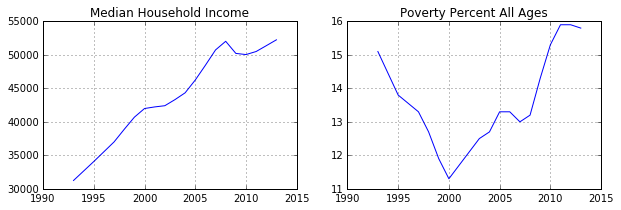

In [11]:
figure(figsize=(10,3))
subplot(1,2,1)
plot(US_stat['Median Household Income'])
title('Median Household Income')
grid()
subplot(1,2,2)
plot(US_stat['Poverty Percent All Ages'])
title('Poverty Percent All Ages')
grid()
print 'poverty percent change ratio from 2000 to 2013 =',\
        float(US_stat['Poverty Percent All Ages']['2013'])/float(US_stat['Poverty Percent All Ages']['2000'])

Compute the percentage of increase in unemplyment in the US between 2000 and 2013.

In [12]:
float(US_stat['Poverty Percent All Ages']['2013'])/float(US_stat['Poverty Percent All Ages']['2000'])

1.3982300884955752

### 2000 was a good year

We see from these graphs that even though the median household in the US keeps increasing at a more or less constant rate, the pocerty levels reached a minimum at 2000 and have increased dramatically , by 40% since then.

We will now attempt to identify the geographic distribution of the rise in poverty since 2000.

We start by plotting the time evolution of poverty for each of the states.

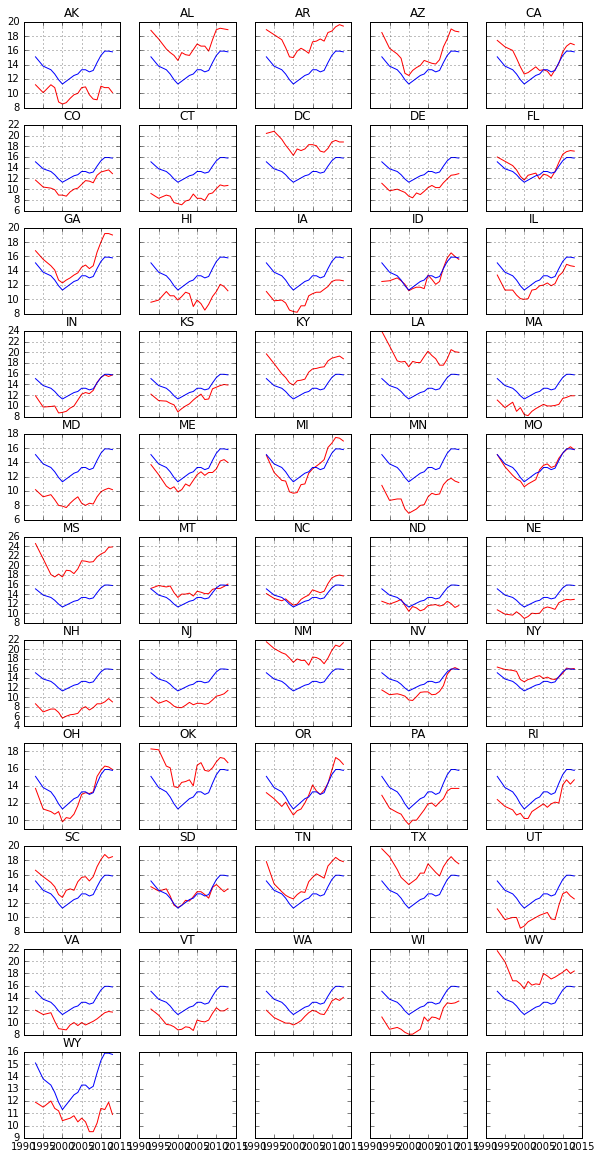

In [13]:
states=list(states_stat.index.levels[0])
rows=11; cols=5;
f, axes = plt.subplots(rows,cols, sharex='col', sharey='row',figsize=[10,20])

i=0
for state in states:
    ax=axes[i/cols,i%cols]
    i+=1
    this_state_stat=states_stat.loc[state]['Poverty Percent All Ages']
    ax.plot(this_state_stat,'r');
    ax.plot(US_stat['Poverty Percent All Ages'],'b')
    ax.set_title(state)
    ax.grid()


In [14]:
mapDf = pd.DataFrame(year_county_df_dict['2000']['FIPS'])
mapDf = pd.merge(mapDf, year_county_df_dict['2000'], on='FIPS', how='inner')
mapDf['Poverty 2000'] = mapDf['Poverty Percent All Ages']
mapDf['Poverty 2000'] = mapDf['Poverty 2000'].astype(float64)
mapDf = mapDf[['FIPS','Poverty 2000']]
mapDf = pd.merge(mapDf, year_county_df_dict['2013'], on='FIPS', how='inner')
mapDf['Poverty 2013'] = mapDf['Poverty Percent All Ages']
mapDf = mapDf[['FIPS','Poverty 2000','Poverty 2013']]

mapDf['FIPS'] = mapDf['FIPS'].astype(int)
mapDf = mapDf[mapDf['Poverty 2013'] != '.']
mapDf['Poverty 2013'] = mapDf['Poverty 2013'].astype(float64)

mapDf['change'] = mapDf['Poverty 2013'].div(mapDf['Poverty 2000'], axis = 0)/1.39
mapDf.head()

,FIPS,Poverty 2000,Poverty 2013,change
0,1001,10.5,13.5,0.924974
1,1003,9.7,14.2,1.053178
2,1005,22.2,28.2,0.913864
3,1007,17.8,23.1,0.933635
4,1009,12.0,17.2,1.031175


In [15]:
import vincent
vincent.core.initialize_notebook()
import json 

In [16]:
with open('us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code munging
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes})

#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(mapDf, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')

county_topo = r'us_counties.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=800, projection='albersUsa',
          data_bind='Poverty 2000', data_key='FIPS',
          map_key={'counties': 'properties.FIPS'}, brew='YlGnBu')
vis.legend(title='Poverty 2000 (%)')
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [2,4,6,8,10,12,20,30]
# This gives the poverty levels for 11
vis.to_json('vega.json')
vis.display()

In [17]:
vis.rebind(column='Poverty 2013', brew='YlGnBu')
vis.legends[0].title='Poverty 2013 (%)'
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [2,4,6,8,10,12,20,30]
vis.to_json('vega.json')
vis.display()

In [19]:
vis.rebind(column='change', brew='RdBu')
vis.legends[0].title = "Change in Poverty percentage, relative to national change, from 2000 to 2013"
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0.7,0.8,0.9,1.0,1.1,1.2,1.3]
vis.to_json('vega.json')
vis.display()

Find out which are the counties in which the poverty percentage increased or decreased the most during the period 2000 - 2014.

In [20]:
maxChange = max(merged['change'])
minChange = min(merged['change'])

maxCounty = merged[merged['change'] == maxChange]
data = df4[df4['FIPS'] == repr(maxCounty['FIPS'].values[0])]
print "County with max increase in poverty -- ",data['Name'].values[0], "in state ", data['Postal'].values[0]
print "change=",maxChange

minCounty = merged[merged['change'] == minChange]
data = df4[df4['FIPS'] == repr(minCounty['FIPS'].values[0])]
print "County with max decrease in poverty -- ",data['Name'].values[0], "in state ", data['Postal'].values[0]
print "change=",minChange

County with max increase in poverty --  Story County in state  IA
change= 1.85120196526
County with max decrease in poverty --  Billings County in state  ND
change= 0.427484099677
